# CAPSTONE PROJECT 2

# 

# TASK :-
## Build a machine learning model for predicting the early onset of  heart disease using the dataset given below

###  Context: The leading cause of death in the developed world is heart disease. Therefore, there needs to be work done to help prevent the risks of having a heart Attack or stroke

# What you need to do?
## Using this dataset you have to predict which patients are most likely to suffer from a 
## heart disease in the near future using the features given.
- 1) Identity the problem type first and then perform Data Cleaning if needed.
- 2) Perform Feature Engineering.
- 3) Check for missing values and replace them using the Simple Imputer from Sk-Learn only. (Choose the best suited strategy for imputation).
- 4) Models to use: 
       ## 1. Logistic Regression
       ## 2. Decision Tree 
       ## 3. Random Forest
- 5) Perform Grid Search and also 10-fold cross validation to find the best Parameters for the problem and finally build a model from the best parameters
- 6) Finally generate predictions on the test set and record the metrics like  Precision,Recall,Accuracy Score for the best Model.
- 7) Optional : You can also evaluate the ROC-AUC curves for the final model Predictions.

### Importing the Dependencies (Libraries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
print('Libraries Import Successful')

from sklearn.preprocessing import LabelEncoder

Libraries Import Successful


## The Solution Approach

### Data Collection & Analysis

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.shape

(270, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


### EDA & Data Visualization

In [6]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [7]:
df['Sex'].value_counts()

1    183
0    87 
Name: Sex, dtype: int64

In [8]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [9]:
df.nunique()

Age                        41 
Sex                        2  
Chest pain type            4  
BP                         47 
Cholesterol                144
FBS over 120               2  
EKG results                3  
Max HR                     90 
Exercise angina            2  
ST depression              39 
Slope of ST                3  
Number of vessels fluro    4  
Thallium                   3  
Heart Disease              2  
dtype: int64

In [10]:
colm = ['Sex', 'Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

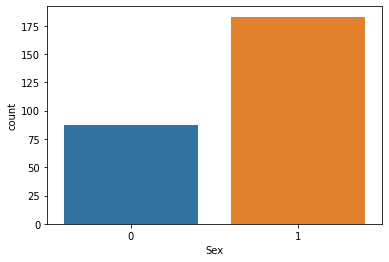

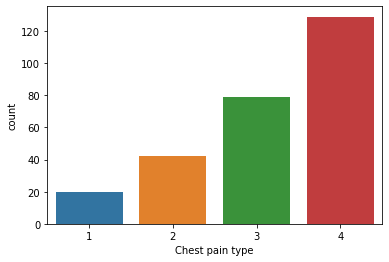

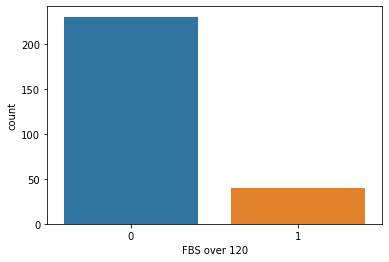

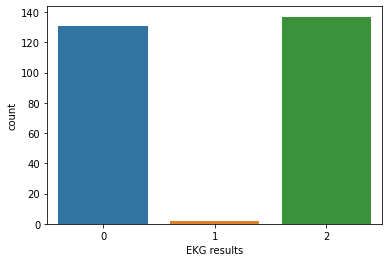

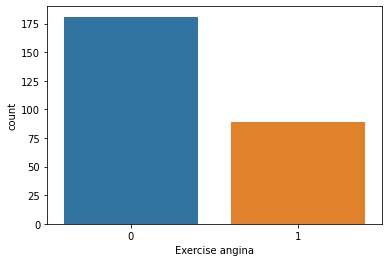

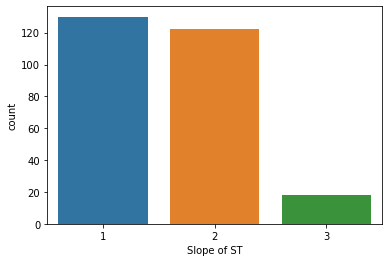

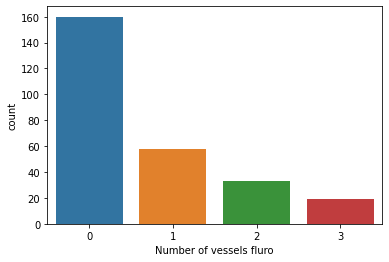

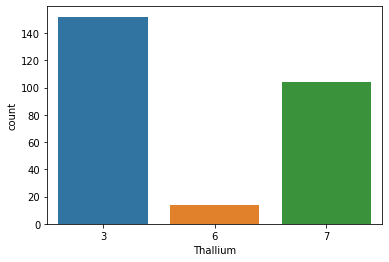

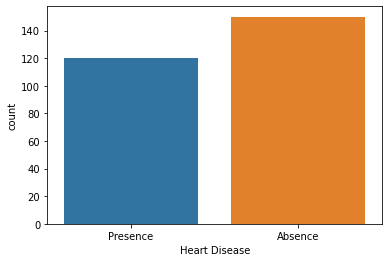

In [11]:
for col in colm:
    sns.countplot(df[col])
    plt.show()

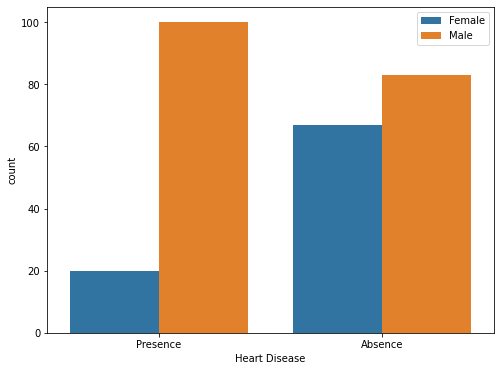

In [12]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Heart Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()

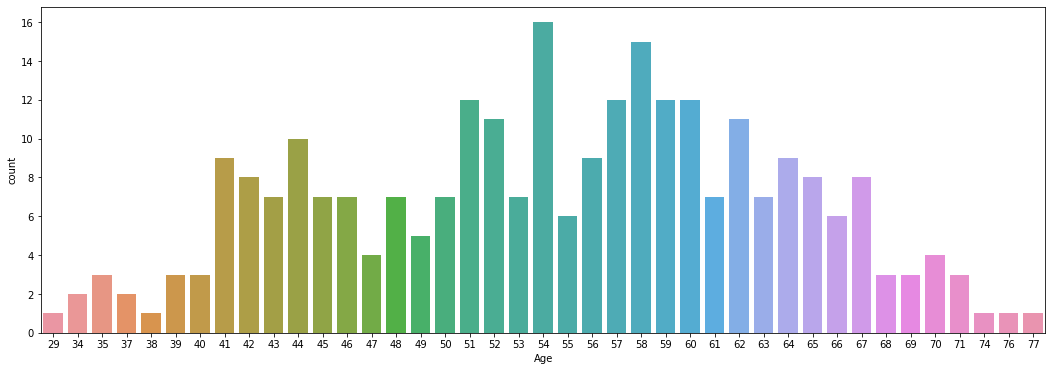

In [13]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x='Age', data=df)

plt.show()

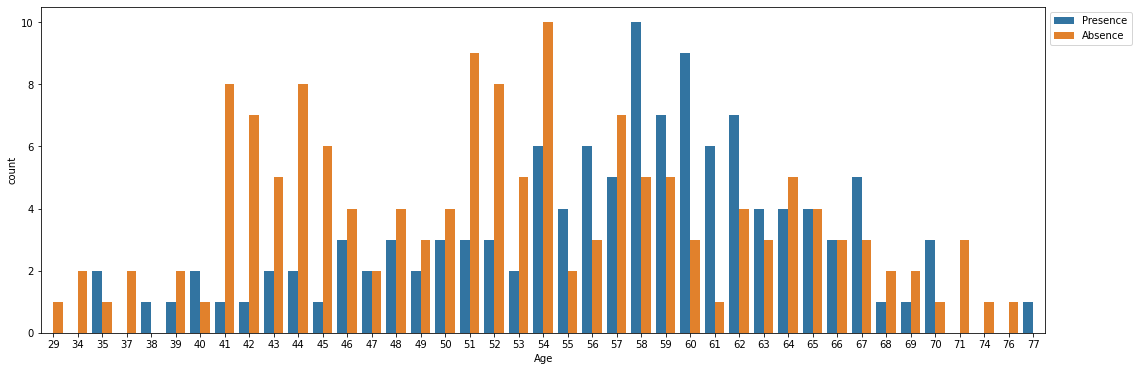

In [14]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x='Age', hue='Heart Disease', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Presence','Absence'], bbox_to_anchor=(1,1))
plt.show()

In [15]:
print(df['Heart Disease'].value_counts())
print(df['Heart Disease'].unique())

Absence     150
Presence    120
Name: Heart Disease, dtype: int64
['Presence' 'Absence']


### Label Encoding

In [16]:
le = LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])
print(df['Heart Disease'].head())

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32


In [17]:
df['Heart Disease'].value_counts() 

0    150
1    120
Name: Heart Disease, dtype: int64

In [18]:
df['Heart Disease'].unique() #Absence(0) = 150 ,Presence(1) = 120

array([1, 0])

##### 0 is for Absence and 1 is for Presence

In [19]:
# Checking for any correlations.
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


<AxesSubplot:>

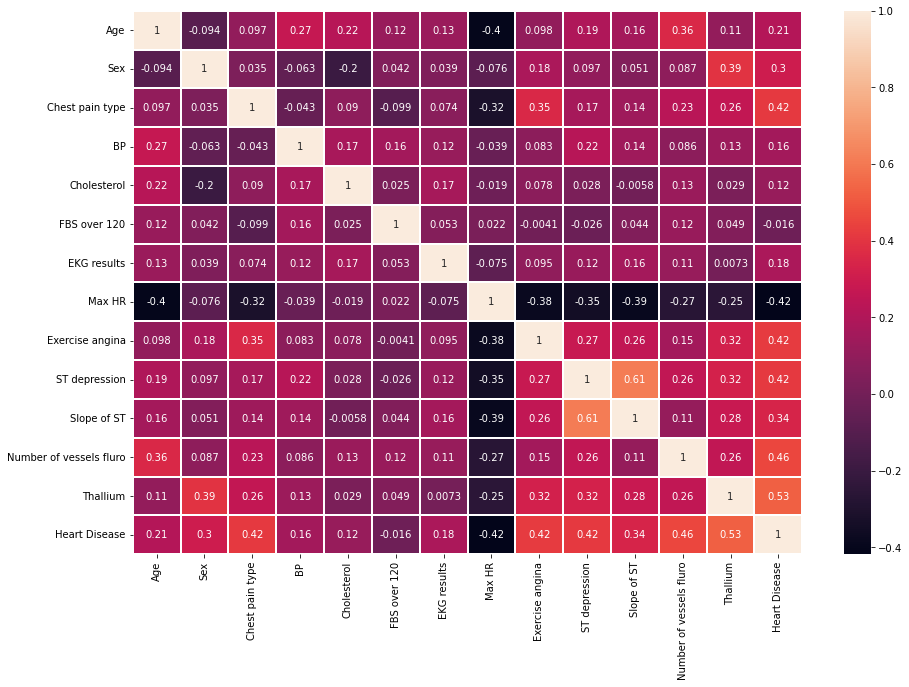

In [20]:
# understanding Correlation With HEATMAP
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths= 0.2, linecolor= 'white')

In [21]:
# Copy of Data set
h_df = df

In [22]:
h_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


### Split the data into Inputs and Target

In [23]:
inputs = h_df.drop('Heart Disease',axis=1)
target = h_df['Heart Disease']

In [24]:
inputs.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [25]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32

## Feature Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaled_inputs = MinMaxScaler().fit_transform(inputs)

In [27]:
scaled_inputs

array([[0.85416667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5625    , 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ]])

## Train_Test_Split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_inputs,target,test_size=0.3,random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 13)
(81, 13)
(189,)
(81,)


## Model Building and Performance Evaluation

# Classification Models :- 1. Logistic Regression , 2. Decision Tree , 3. Random Forest, 4. HyperParameter Tuning for  Random Forest

## 1) Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [31]:
print("Test data accuracy is : ",lr_model.score(X_test, y_test)) 
print("Train data accuracy is : ",lr_model.score(X_train, y_train))

Test data accuracy is :  0.8271604938271605
Train data accuracy is :  0.8571428571428571


In [32]:
predicted =lr_model.predict(X_test)

In [33]:
pred_prob= lr_model.predict_proba(X_test)

In [34]:
from sklearn.metrics import accuracy_score
logi = accuracy_score(y_test, predicted)
print ("Accuracy for Logistic Regression: {}".format(logi))

Accuracy for Logistic Regression: 0.8271604938271605


In [35]:
h_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [56]:
my_input2 = [[74,0,2,120,269,0,2,121,1,0.2,1,1,3]]

In [49]:
scaled_inputs1 = MinMaxScaler().fit_transform(my_input2)

In [57]:
test_pred1 = lr_model.predict(my_input2)

In [58]:
test_pred1

array([1])

In [147]:
from sklearn .metrics import confusion_matrix
cm= confusion_matrix(y_test,predicted)
cm

array([[41,  7],
       [ 7, 26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

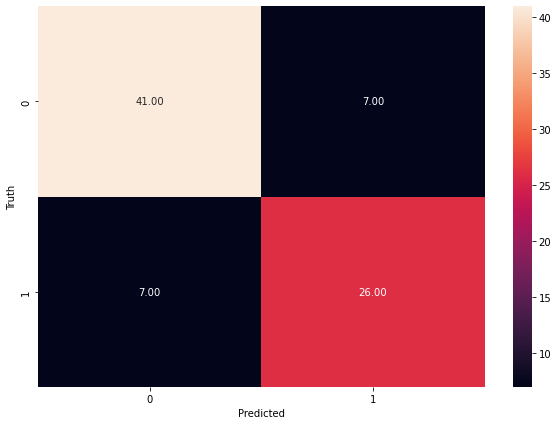

In [148]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [149]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.79      0.79      0.79        33

    accuracy                           0.83        81
   macro avg       0.82      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



#### ROC curve

<Figure size 432x288 with 0 Axes>

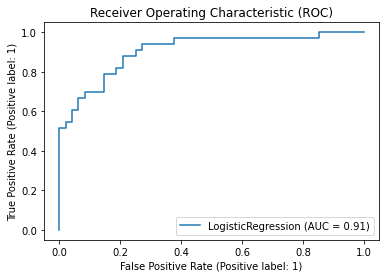

Logistic Regression score:  0.8271604938271605


In [150]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

plt.figure()
metrics.plot_roc_curve(lr_model, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Logistic Regression score: ", logi)

In [151]:
from sklearn.metrics import roc_curve,roc_auc_score
AUC_Test = ('Area Under Curve :', roc_auc_score(y_test,  pred_prob[:,1]))
print(AUC_Test)

('Area Under Curve :', 0.9059343434343434)


### AUC(Area under Curve) is nearly 90.5%, which is good. this means model is covering 90.5% of the datapoints well.

## 2) Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
print("Test data accuracy is : ",dt_model.score(X_test, y_test)) 
print("Train data accuracy is : ",dt_model.score(X_train, y_train))

Test data accuracy is :  0.7407407407407407
Train data accuracy is :  1.0


In [154]:
predicted1 =dt_model.predict(X_test)

In [192]:
deci = accuracy_score(y_test, predicted1)
print ("Accuracy for Decision Tree: {}".format(deci))

Accuracy for Decision Tree: 0.7407407407407407


In [156]:
from sklearn .metrics import confusion_matrix
cm1= confusion_matrix(y_test,predicted1)
cm1

array([[36, 12],
       [ 9, 24]], dtype=int64)

Text(69.0, 0.5, 'Truth')

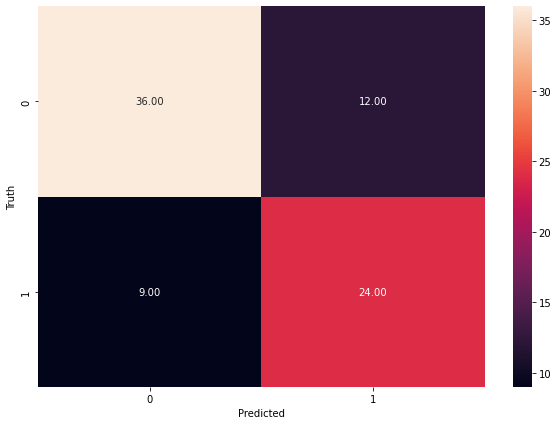

In [157]:
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted1))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        48
           1       0.67      0.73      0.70        33

    accuracy                           0.74        81
   macro avg       0.73      0.74      0.73        81
weighted avg       0.75      0.74      0.74        81



In [202]:
pred_prob1 = dt_model.predict_proba(X_test)

<Figure size 432x288 with 0 Axes>

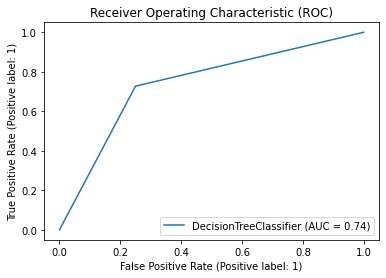

Decision Tree score:  0.7407407407407407


In [160]:
plt.figure()
metrics.plot_roc_curve(dt_model, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Decision Tree score: ", deci)

In [161]:
AUC_Test = ('Area Under Curve :',  roc_auc_score(y_test,  pred_prob1[:,1]))
AUC_Test

('Area Under Curve :', 0.7386363636363636)

 ## 3) Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [163]:
print("Test data accuracy is : ",rf_model.score(X_test, y_test)) 
print("Train data accuracy is : ",rf_model.score(X_train, y_train))

Test data accuracy is :  0.8024691358024691
Train data accuracy is :  1.0


In [164]:
predicted2 =rf_model.predict(X_test)

In [165]:
random = accuracy_score(y_test, predicted2)
print ("Accuracy for Random Forest: {}".format(random))

Accuracy for Random Forest: 0.8024691358024691


In [166]:
from sklearn .metrics import confusion_matrix
cm2= confusion_matrix(y_test,predicted2)
cm2

array([[37, 11],
       [ 5, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

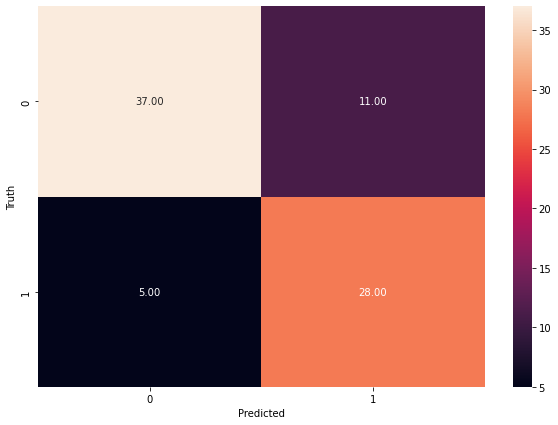

In [167]:
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [168]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.72      0.85      0.78        33

    accuracy                           0.80        81
   macro avg       0.80      0.81      0.80        81
weighted avg       0.81      0.80      0.80        81



In [169]:
pred_prob2 = rf_model.predict_proba(X_test)

array([[0.56, 0.44],
       [0.67, 0.33],
       [0.11, 0.89],
       [0.15, 0.85],
       [0.67, 0.33],
       [0.59, 0.41],
       [0.63, 0.37],
       [0.7 , 0.3 ],
       [0.43, 0.57],
       [0.77, 0.23],
       [0.82, 0.18],
       [0.65, 0.35],
       [0.65, 0.35],
       [0.1 , 0.9 ],
       [0.12, 0.88],
       [0.85, 0.15],
       [0.89, 0.11],
       [0.41, 0.59],
       [0.24, 0.76],
       [0.71, 0.29],
       [0.02, 0.98],
       [0.89, 0.11],
       [0.08, 0.92],
       [0.27, 0.73],
       [0.46, 0.54],
       [0.71, 0.29],
       [0.66, 0.34],
       [0.83, 0.17],
       [0.39, 0.61],
       [0.47, 0.53],
       [0.47, 0.53],
       [0.35, 0.65],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.1 , 0.9 ],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.23, 0.77],
       [1.  , 0.  ],
       [0.68, 0.32],
       [0.47, 0.53],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.14, 0.86],
       [0.9 , 0.1 ],
       [0.71, 0.29],
       [0.22, 0.78],
       [0.57,

<Figure size 432x288 with 0 Axes>

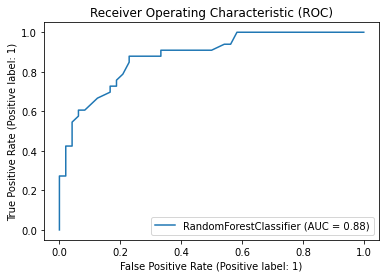

Random Forest score:  0.8024691358024691


In [170]:
plt.figure()
metrics.plot_roc_curve(rf_model, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Random Forest score: ", random)

In [171]:
AUC_Test = ('Area Under Curve :', roc_auc_score(y_test,  pred_prob2[:,1]))
AUC_Test

('Area Under Curve :', 0.880050505050505)

## 4) Random Forest Hyper-Parameter Tuning

### By using GridSearchCV

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
#run a gridsearch cross validation random forest model with 10 fold cross validation

param_grid_var_rf = {"max_depth":[2,3,4,5],
                  "max_features":[1,3,5,10],
                  "min_samples_split":[2,3,5,10],
                  "criterion":["gini","entropy"],
                  "min_samples_leaf":[1,2,3,4]}

grid_search_rf = GridSearchCV(rf_model,param_grid= param_grid_var_rf,cv=10)
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 10]})

In [174]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [175]:
print(grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_.get_params())

0.8728070175438598
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


##### Random Forest using above Hyper Parameter tuned Best Params

In [176]:
rf_tuned = RandomForestClassifier(**grid_search_rf.best_params_)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=1,
                       min_samples_leaf=4, min_samples_split=10)

In [177]:
print("Test data accuracy is : ",rf_tuned.score(X_test, y_test)) 
print("Train data accuracy is : ",rf_tuned.score(X_train, y_train))

Test data accuracy is :  0.8148148148148148
Train data accuracy is :  0.8888888888888888


In [178]:
pred_rf_tune_test = rf_tuned.predict(X_test)

In [179]:
random_grid = accuracy_score(y_test, pred_rf_tune_test)
print ("Accuracy for Random Forest with Parameter Tuning: {}".format(random_grid))

Accuracy for Random Forest with Parameter Tuning: 0.8148148148148148


In [180]:
from sklearn .metrics import confusion_matrix
cm3= confusion_matrix(y_test,pred_rf_tune_test)
cm3

array([[40,  8],
       [ 7, 26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

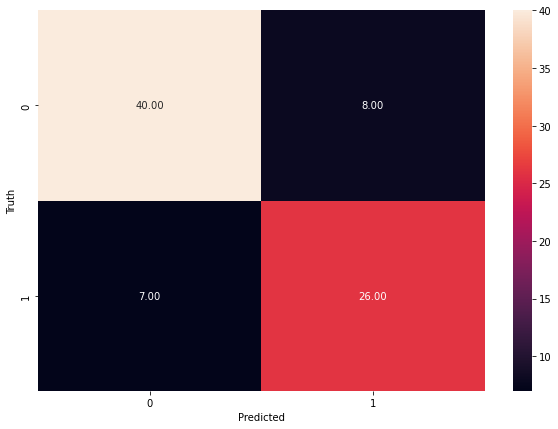

In [181]:
plt.figure(figsize = (10,7))
sns.heatmap(cm3, annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [182]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_rf_tune_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.76      0.79      0.78        33

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



In [194]:
pred_prob3 = rf_tuned.predict_proba(X_test)

<Figure size 432x288 with 0 Axes>

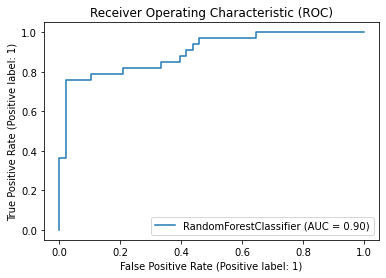

Random Forest Tuned score:  0.8148148148148148


In [184]:
plt.figure()
metrics.plot_roc_curve(rf_tuned, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC)")
plt.show()

print("Random Forest Tuned score: ", random_grid)

In [185]:
AUC_Test = ('Area Under Curve :', roc_auc_score(y_test,  pred_prob3[:,1]))
AUC_Test

('Area Under Curve :', 0.9008838383838383)

## Results :- Model Comparison

In [198]:
data = {'Models':['Logistic Regression', 
                      'Decision Tree', 
                      'Random Forest', 
                      'Random Forest Tuned'],
        "Accuracy":[logi*100,
                    deci*100,
                    random*100,
                    random_grid*100]
        }

data = pd.DataFrame(data)

data.sort_values('Accuracy', ascending=False)

,Estimators,Accuracy
0,Logistic Regression,82.716049
3,Random Forest Tuned,81.481481
2,Random Forest,80.246914
1,Decision Tree,74.074074


## Conclusion :-

## Accuracy with 'Decision Tree' is Best here without having Overfitting or Underfitting Problem

In [200]:
##### end #####